# Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [ ]:
#Loading the dataset from the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
uscis_data= pd.read_csv('/content/drive/MyDrive/Data Mining/Project/USCIS_data.csv')

In [ ]:
uscis_data.head()

,Line by line,Fiscal Year,Employer (Petitioner) Name,Tax ID,Industry (NAICS) Code,Petitioner City,Petitioner State,Petitioner Zip Code,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial
0,1,2024,NaN,3581.0,"54 - Professional, Scientific, and Technical S...",LAFAYETTE,CA,94549.0,0,0,1,0
1,2,2024,1 800 FLOWERS COM INC,7311.0,44-45 - Retail Trade,JERICHO,NY,11753.0,0,0,2,0
2,3,2024,1 POINT SYSTEM LLC,6496.0,"54 - Professional, Scientific, and Technical S...",FORT MILL,SC,29708.0,0,0,1,0
3,4,2024,1POINT3ACRES LLC,301.0,51 - Information,BELLEVUE,WA,98005.0,1,0,0,0
4,5,2024,1ST CHOICE DENTAL LLC,5644.0,62 - Health Care and Social Assistance,BRIDGEVIEW,IL,60455.0,0,0,1,0


# Data Preprocessing

In [ ]:
uscis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23185 entries, 0 to 23184
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Line by line                23185 non-null  object 
 1   Fiscal Year                 23185 non-null  int64  
 2   Employer (Petitioner) Name  23184 non-null  object 
 3   Tax ID                      23038 non-null  float64
 4   Industry (NAICS) Code       22975 non-null  object 
 5   Petitioner City             23185 non-null  object 
 6   Petitioner State            23185 non-null  object 
 7   Petitioner Zip Code         23184 non-null  float64
 8   Initial Approval            23185 non-null  int64  
 9   Initial Denial              23185 non-null  int64  
 10  Continuing Approval         23185 non-null  int64  
 11  Continuing Denial           23185 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


In [ ]:
uscis_data.describe()

,Fiscal Year,Tax ID,Petitioner Zip Code,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial
count,23185.0,23038.000000,23184.000000,23185.000000,23185.000000,23185.000000,23185.000000
mean,2024.0,4954.177750,48973.728261,1.297261,0.034764,2.455812,0.041967
std,0.0,2896.519143,33017.347256,8.550436,0.258898,21.492482,0.582118
min,2024.0,1.000000,624.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.0,2431.500000,17055.000000,0.000000,0.000000,0.000000,0.000000
50%,2024.0,4944.000000,48104.000000,0.000000,0.000000,1.000000,0.000000
75%,2024.0,7469.750000,78681.000000,1.000000,0.000000,1.000000,0.000000
max,2024.0,9999.000000,99775.000000,651.000000,14.000000,1209.000000,59.000000


In [ ]:
missing_values = uscis_data.isnull().sum()
missing_values

Line by line                    0
Fiscal Year                     0
Employer (Petitioner) Name      1
Tax ID                        147
Industry (NAICS) Code         210
Petitioner City                 0
Petitioner State                0
Petitioner Zip Code             1
Initial Approval                0
Initial Denial                  0
Continuing Approval             0
Continuing Denial               0
dtype: int64

In [ ]:
uscis_data.dtypes

Line by line                   object
Fiscal Year                     int64
Employer (Petitioner) Name     object
Tax ID                        float64
Industry (NAICS) Code          object
Petitioner City                object
Petitioner State               object
Petitioner Zip Code           float64
Initial Approval                int64
Initial Denial                  int64
Continuing Approval             int64
Continuing Denial               int64
dtype: object

# EDA

# **Top 10 State by H1B approvals**

In [30]:
# Calculate the sum of Initial and Continuing Approvals for each state
uscis_data['Total Approvals'] = uscis_data['Initial Approval'] + uscis_data['Continuing Approval']
statewise_approvals = uscis_data.groupby('Petitioner State')['Total Approvals'].sum()

# Sort and get the top 10 states
top_10_states = statewise_approvals.sort_values(ascending=False).head(10)
print(top_10_states)


Petitioner State
CA    15972
TX    11718
NJ     9322
NY     6496
IL     5351
VA     4934
MA     3163
MI     3120
GA     2497
PA     2471
Name: Total Approvals, dtype: int64


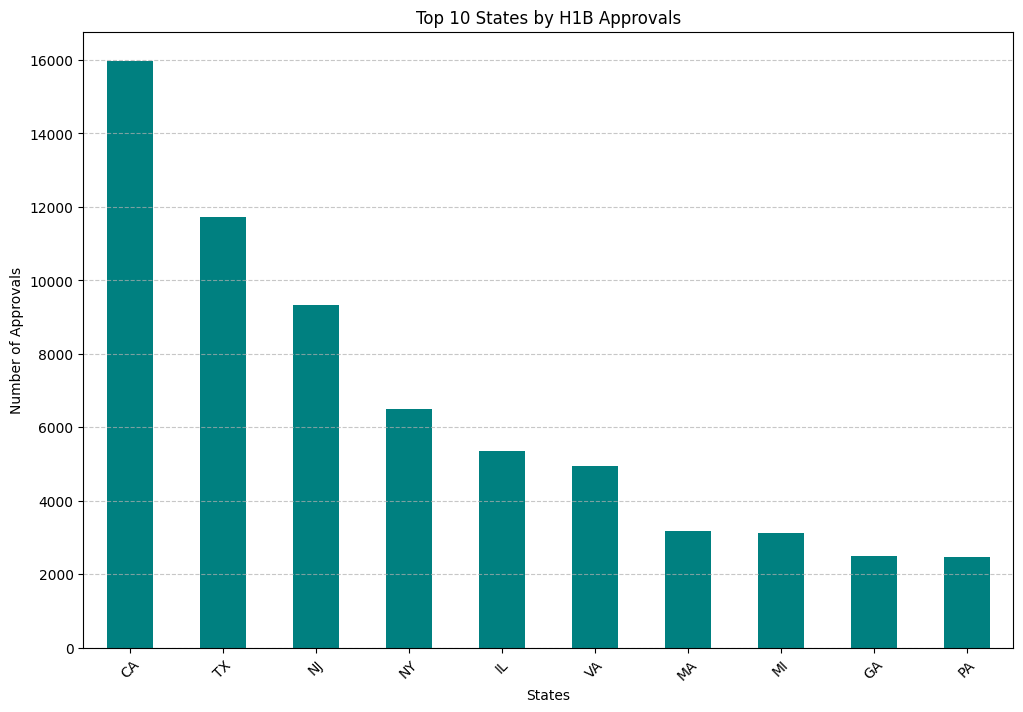

In [31]:
plt.figure(figsize=(12, 8))
top_10_states.plot(kind='bar', color='teal')
plt.title('Top 10 States by H1B Approvals')
plt.xlabel('States')
plt.ylabel('Number of Approvals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 ***California*** is at the forefront with the *highest number of approvals*, followed by ***Texas and New Jersey***. The values gradually decrease as we move from left to right, indicating *fewer approvals* in states like ***Georgia and Pennsylvania***, which have the least approvals among the top ten. This chart highlights the significant variance in H1B visa approvals across different states.

# **Top sectors by H1B approvals**

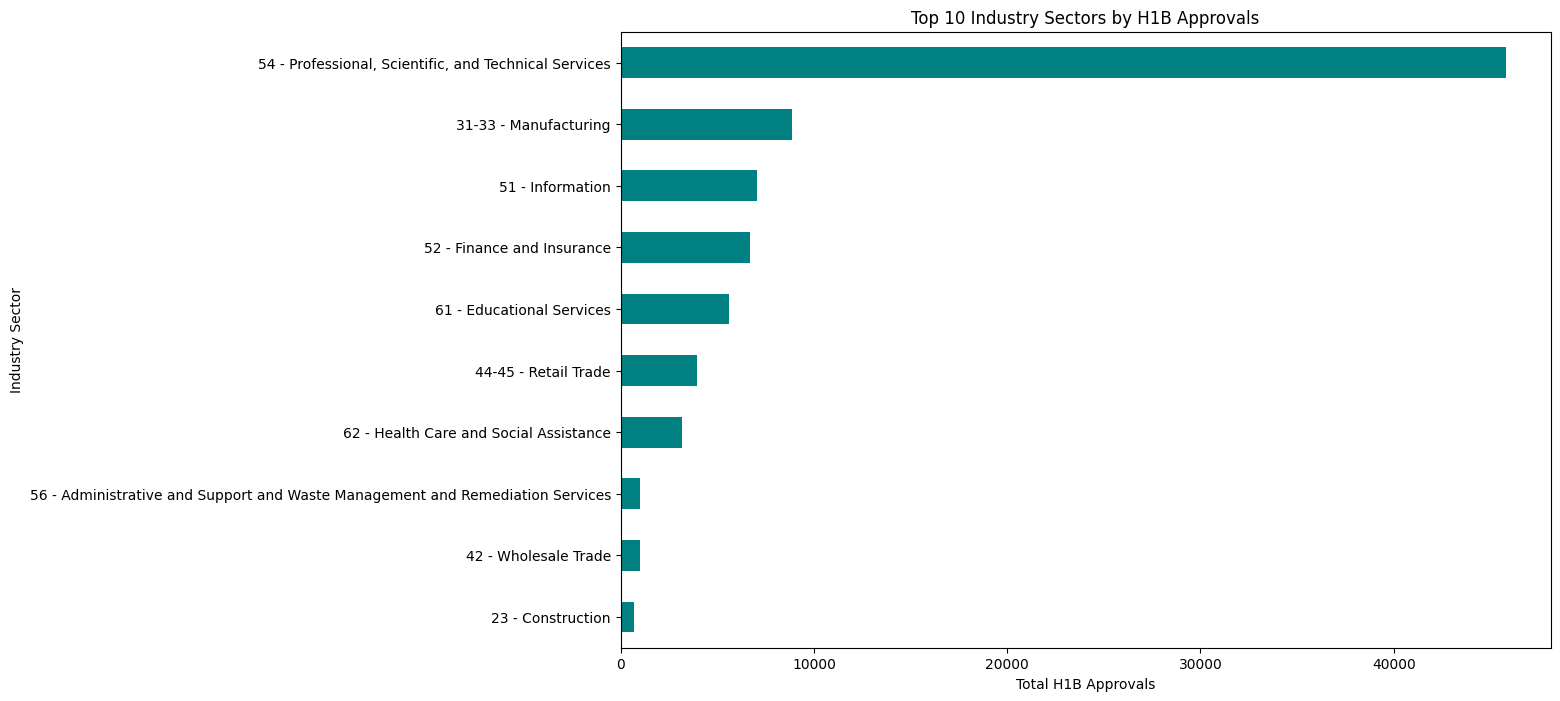

In [ ]:
# Aggregate the total approvals by industry sector
industry_approvals = uscis_data.groupby('Industry (NAICS) Code')['Total Approvals'].sum().sort_values(ascending=False)

# Convert the Series to a DataFrame for the table
industry_approvals_df = industry_approvals.reset_index()
industry_approvals_df.columns = ['Industry Sector', 'Total Approvals']

# Display the table
industry_approvals_df.head(10), industry_approvals_df.to_markdown(index=False)
# Plotting the sector-wise H1B approvals
plt.figure(figsize=(12, 8))
industry_approvals.head(10).plot(kind='barh', color='teal')
plt.xlabel('Total H1B Approvals')
plt.ylabel('Industry Sector')
plt.title('Top 10 Industry Sectors by H1B Approvals')
plt.gca().invert_yaxis()  # Invert the y-axis to show the sector with the highest approvals at the top
plt.show()



The **"Professional, Scientific, and Technical Services"** sector *leads* overwhelmingly, followed by ***"Manufacturing" and "Information."*** Other significant sectors include *"Finance and Insurance," "Educational Services," and "Health Care and Social Assistance,"* with varying numbers of approvals. This visualization highlights the diversity of industries relying on H1B visas for specialized labor.

# Relationship between **Initial** and **Continuing H1B Approvals**

In [ ]:
# Directly calculating the correlation coefficient between Initial Approval and Continuing Approval
correlation_coefficient = uscis_data['Initial Approval'].corr(uscis_data['Continuing Approval'])
correlation_coefficient


0.8291393044414344

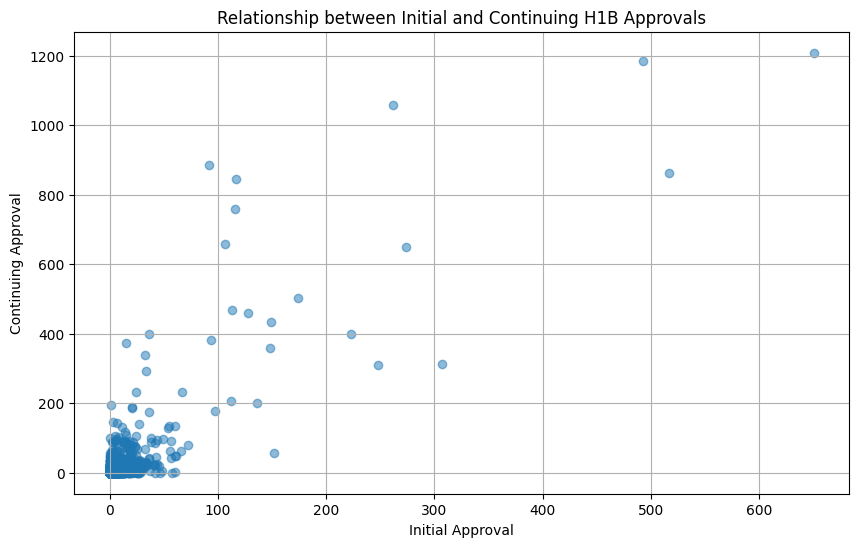

In [ ]:
# Plotting a scatter plot to visualize the relationship between Initial Approval and Continuing Approval
plt.figure(figsize=(10, 6))
plt.scatter(uscis_data['Initial Approval'], uscis_data['Continuing Approval'], alpha=0.5)
plt.title('Relationship between Initial and Continuing H1B Approvals')
plt.xlabel('Initial Approval')
plt.ylabel('Continuing Approval')
plt.grid(True)
plt.show()


In [19]:
# To explore industry-specific trends, we will look at approval and denial rates within each industry.

# Create columns for total denials
uscis_data['Total Denials'] = uscis_data['Initial Denial'] + uscis_data['Continuing Denial']

# Group by industry and calculate sums for approvals and denials, and count for number of entries
industry_trends = uscis_data.groupby('Industry (NAICS) Code').agg(
    Total_Approvals=pd.NamedAgg(column='Total Approvals', aggfunc='sum'),
    Total_Denials=pd.NamedAgg(column='Total Denials', aggfunc='sum'),
    Entries=pd.NamedAgg(column='Industry (NAICS) Code', aggfunc='count')
)

# Calculate approval and denial rates
industry_trends['Approval Rate'] = industry_trends['Total_Approvals'] / (industry_trends['Total_Approvals'] + industry_trends['Total_Denials'])
industry_trends['Denial Rate'] = industry_trends['Total_Denials'] / (industry_trends['Total_Approvals'] + industry_trends['Total_Denials'])

# Sort industries by the number of entries for better visualization
industry_trends_sorted = industry_trends.sort_values(by='Entries', ascending=False)

# Selecting top 10 industries to visualize
top_industries = industry_trends_sorted.head(10)

# Displaying the result
top_industries[['Total_Approvals', 'Total_Denials', 'Approval Rate', 'Denial Rate']]


,Total_Approvals,Total_Denials,Approval Rate,Denial Rate
Industry (NAICS) Code,,,,
"54 - Professional, Scientific, and Technical Services",45826,1120,0.976143,0.023857
31-33 - Manufacturing,8870,109,0.987861,0.012139
62 - Health Care and Social Assistance,3174,86,0.973620,0.026380
52 - Finance and Insurance,6707,55,0.991866,0.008134
51 - Information,7074,81,0.988679,0.011321
61 - Educational Services,5620,107,0.981317,0.018683
42 - Wholesale Trade,979,18,0.981946,0.018054
44-45 - Retail Trade,3957,94,0.976796,0.023204
23 - Construction,689,9,0.987106,0.012894
